# TP SVM classification

Diane Lingrand (diane.lingrand@univ-cotedazur)

Université Nice Côte d'Azur


Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html


In [41]:
# necessary imports
import time

import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.metrics import (ConfusionMatrixDisplay, confusion_matrix,
                             f1_score, plot_confusion_matrix)


## dataset: Iris


In [24]:
# loading the dataset
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target


In [25]:
# split into train and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)


In [26]:
print("train: ", y_train)
print("test: ", y_test)


train:  [2 0 0 1 1 1 0 1 0 2 0 2 1 1 0 0 1 2 2 1 0 2 1 1 1 0 0 0 1 0 2 0 0 0 1 2 2
 2 0 0 2 1 1 2 1 2 1 2 0 0 0 0 0 1 1 1 2 0 1 0 0 1 1 1 0 2 0 2 2 2 2 0 2 0
 2 1 2 1 2 2 1 1 2 0 1 0 0 2 1 2]
test:  [1 2 2 0 2 0 0 1 2 1 0 0 2 2 0 1 2 1 2 1 1 2 0 0 2 2 2 1 2 0 0 2 2 1 0 2 1
 1 1 1 1 2 2 2 1 1 1 2 1 0 0 2 1 1 2 0 0 0 0 0]


### classification of only 2 classes


In [27]:
# we choose to remove class with label 2 (Iris Virginica)
X_trainBinaire = X_train[y_train != 2]
y_trainBinaire = y_train[y_train != 2]
X_testBinaire = X_test[y_test != 2]
y_testBinaire = y_test[y_test != 2]


In [28]:
# verification that we have binary labels for only 2 classes
print("train: ", y_trainBinaire)
print("test: ", y_testBinaire)


train:  [0 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0
 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 0 1 0 0 1]
test:  [1 0 0 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0
 0]


In [29]:
# default constructor
mySvcBin = svm.SVC(kernel="linear")
# learning
time_start = time.perf_counter()
mySvcBin.fit(X_trainBinaire, y_trainBinaire)
time_elapsed = time.perf_counter() - time_start
print("learning done in %.2f seconds" % (time_elapsed))


learning done in 0.00 seconds


F1 score :  1.0


/home/joris/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


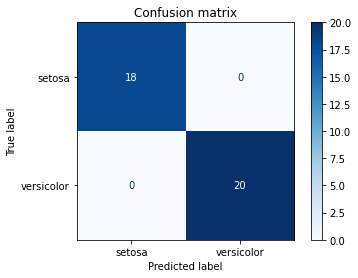

In [30]:
# test performances
y_predBinaire = mySvcBin.predict(X_testBinaire)

disp = plot_confusion_matrix(
    mySvcBin,
    X_testBinaire,
    y_testBinaire,
    display_labels=list(iris.target_names)[0:2],
    cmap=plt.cm.Blues,
    normalize=None,
)
disp.ax_.set_title("Confusion matrix")
print("F1 score : ", f1_score(y_predBinaire, y_testBinaire))


### classification of all classes


learning done in 0.0 seconds


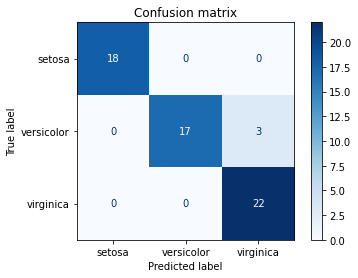

learning done in 0.0 seconds
Macro F1 score :  0.9516963772282921


0.9516963772282921

In [69]:
def make_svc_model(kernel="linear", C=4, decision_function_shape="ovo"):
    """
    Make a SVC model. Default parameters are the ones given in the lab.
    """
    # default constructor
    mySvc = svm.SVC(kernel=kernel, C=C, decision_function_shape=decision_function_shape)
    # learning
    time_start = time.perf_counter()
    mySvc.fit(X_train, y_train)
    time_elapsed = time.perf_counter() - time_start
    print(f"learning done in {round(time_elapsed, 2)} seconds")
    return mySvc


def plot_cm_from_svc(mySvc=None):
    """
    Plot confusion matrix from SVC. Default SVC is the default of `make_svc_model()` function.
    """
    if mySvc is None:
        mySvc = make_svc_model()
    # test performances
    y_pred = mySvc.predict(X_test)

    disp = ConfusionMatrixDisplay.from_estimator(
        estimator=mySvc,
        X=X_test,
        y=y_test,
        display_labels=list(iris.target_names),
        cmap=plt.cm.Blues,
        normalize=None,
    )
    disp.ax_.set_title("Confusion matrix")
    plt.show()

def f1_score_from_svc(mySvc=None):
    """
    Compute F1 score from SVC. Default SVC is the default of `make_svc_model()` function.
    """
    if mySvc is None:
        mySvc = make_svc_model()
    y_pred = mySvc.predict(X_test)
    f1 = f1_score(y_pred, y_test, average="macro")
    print("Macro F1 score : ", f1)
    return f1


plot_cm_from_svc()
f1_score_from_svc()


Can we do it better? Try other kernels, other hyper-parameters (C, ...)


### My trials


Try other kernels, other hyper-parameters (C, ...), 'ovo' or 'ovr' for the multiclass problem.



----------------------
kernel:	linear
C:	1
decision_function_shape:	ovo

learning done in 0.0 seconds


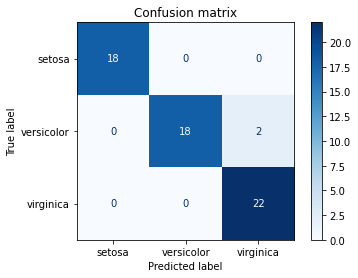

Macro F1 score :  0.9679633867276888

----------------------
kernel:	linear
C:	1
decision_function_shape:	ovr

learning done in 0.0 seconds


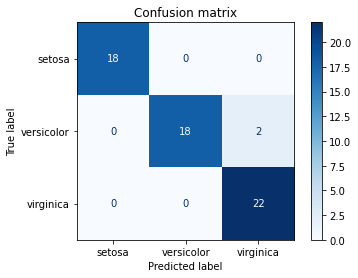

Macro F1 score :  0.9679633867276888

----------------------
kernel:	linear
C:	2
decision_function_shape:	ovo

learning done in 0.0 seconds


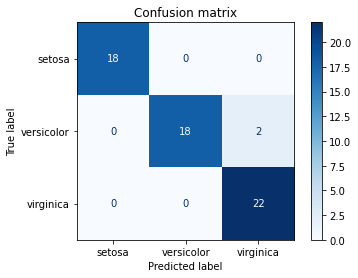

Macro F1 score :  0.9679633867276888

----------------------
kernel:	linear
C:	2
decision_function_shape:	ovr

learning done in 0.0 seconds


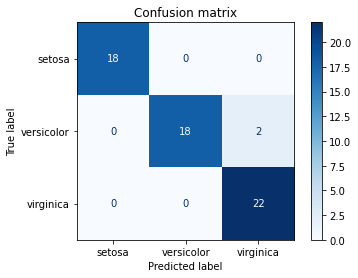

Macro F1 score :  0.9679633867276888

----------------------
kernel:	linear
C:	5
decision_function_shape:	ovo

learning done in 0.0 seconds


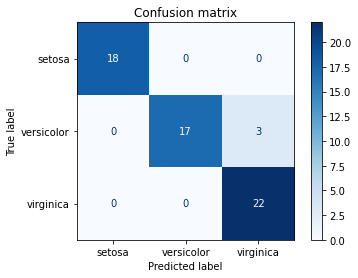

Macro F1 score :  0.9516963772282921

----------------------
kernel:	linear
C:	5
decision_function_shape:	ovr

learning done in 0.0 seconds


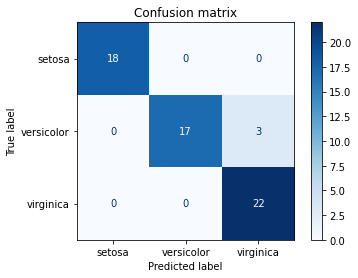

Macro F1 score :  0.9516963772282921

----------------------
kernel:	linear
C:	10
decision_function_shape:	ovo

learning done in 0.0 seconds


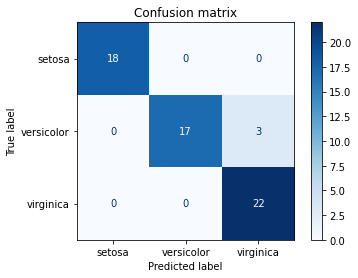

Macro F1 score :  0.9516963772282921

----------------------
kernel:	linear
C:	10
decision_function_shape:	ovr

learning done in 0.0 seconds


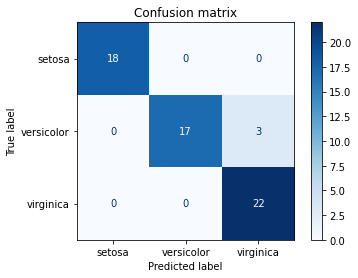

Macro F1 score :  0.9516963772282921

----------------------
kernel:	linear
C:	inf
decision_function_shape:	ovo

learning done in 0.0 seconds


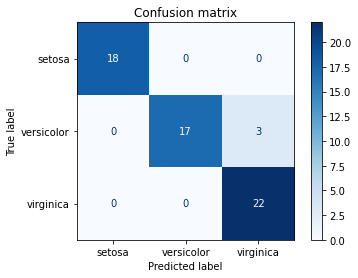

Macro F1 score :  0.9516963772282921

----------------------
kernel:	linear
C:	inf
decision_function_shape:	ovr

learning done in 0.0 seconds


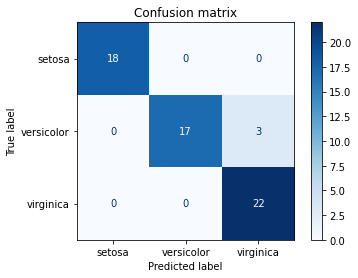

Macro F1 score :  0.9516963772282921

----------------------
kernel:	poly
C:	1
decision_function_shape:	ovo

learning done in 0.0 seconds


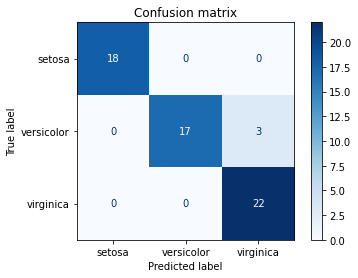

Macro F1 score :  0.9516963772282921

----------------------
kernel:	poly
C:	1
decision_function_shape:	ovr

learning done in 0.0 seconds


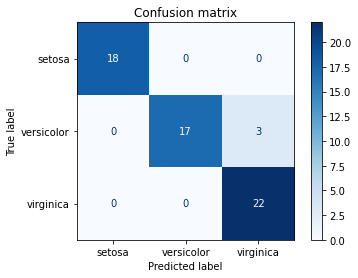

Macro F1 score :  0.9516963772282921

----------------------
kernel:	poly
C:	2
decision_function_shape:	ovo

learning done in 0.0 seconds


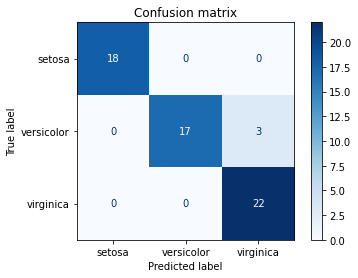

Macro F1 score :  0.9516963772282921

----------------------
kernel:	poly
C:	2
decision_function_shape:	ovr

learning done in 0.0 seconds


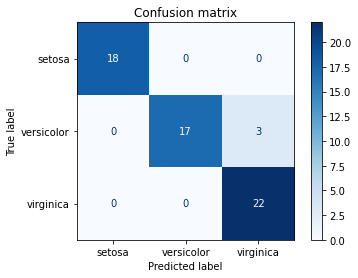

Macro F1 score :  0.9516963772282921

----------------------
kernel:	poly
C:	5
decision_function_shape:	ovo

learning done in 0.0 seconds


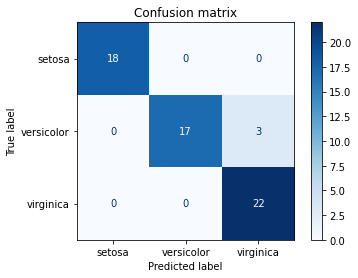

Macro F1 score :  0.9516963772282921

----------------------
kernel:	poly
C:	5
decision_function_shape:	ovr

learning done in 0.0 seconds


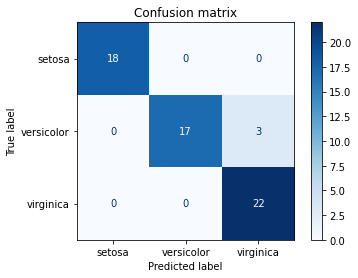

Macro F1 score :  0.9516963772282921

----------------------
kernel:	poly
C:	10
decision_function_shape:	ovo

learning done in 0.0 seconds


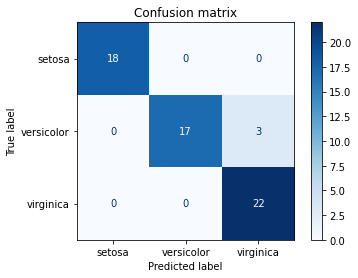

Macro F1 score :  0.9516963772282921

----------------------
kernel:	poly
C:	10
decision_function_shape:	ovr

learning done in 0.0 seconds


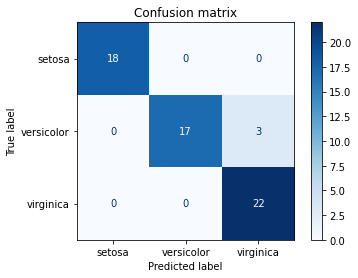

Macro F1 score :  0.9516963772282921

----------------------
kernel:	poly
C:	inf
decision_function_shape:	ovo

learning done in 0.0 seconds


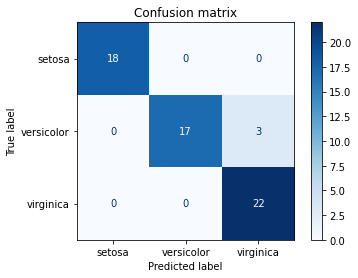

Macro F1 score :  0.9516963772282921

----------------------
kernel:	poly
C:	inf
decision_function_shape:	ovr

learning done in 0.0 seconds


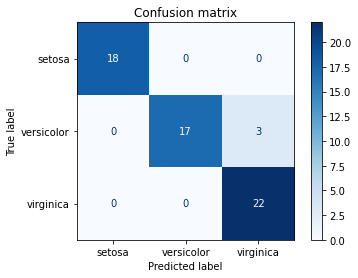

Macro F1 score :  0.9516963772282921

----------------------
kernel:	rbf
C:	1
decision_function_shape:	ovo

learning done in 0.0 seconds


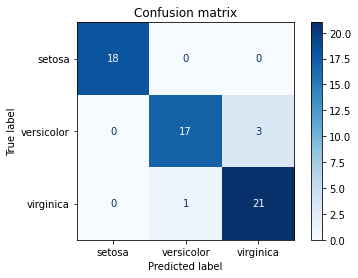

Macro F1 score :  0.9359267734553777

----------------------
kernel:	rbf
C:	1
decision_function_shape:	ovr

learning done in 0.0 seconds


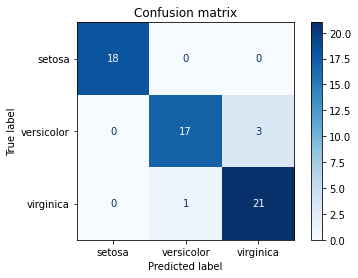

Macro F1 score :  0.9359267734553777

----------------------
kernel:	rbf
C:	2
decision_function_shape:	ovo

learning done in 0.0 seconds


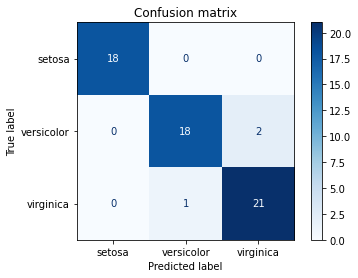

Macro F1 score :  0.9521367521367522

----------------------
kernel:	rbf
C:	2
decision_function_shape:	ovr

learning done in 0.0 seconds


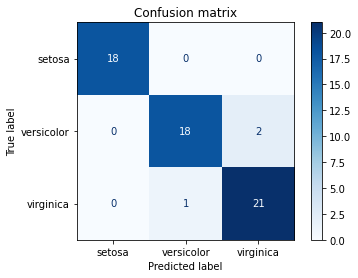

Macro F1 score :  0.9521367521367522

----------------------
kernel:	rbf
C:	5
decision_function_shape:	ovo

learning done in 0.0 seconds


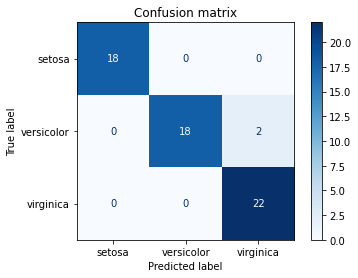

Macro F1 score :  0.9679633867276888

----------------------
kernel:	rbf
C:	5
decision_function_shape:	ovr

learning done in 0.0 seconds


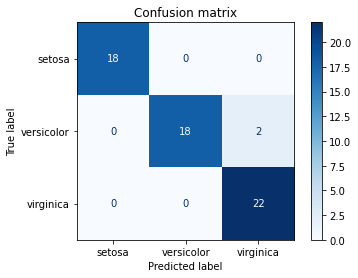

Macro F1 score :  0.9679633867276888

----------------------
kernel:	rbf
C:	10
decision_function_shape:	ovo

learning done in 0.0 seconds


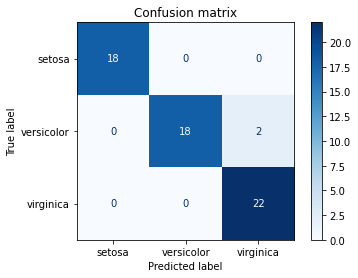

Macro F1 score :  0.9679633867276888

----------------------
kernel:	rbf
C:	10
decision_function_shape:	ovr

learning done in 0.0 seconds


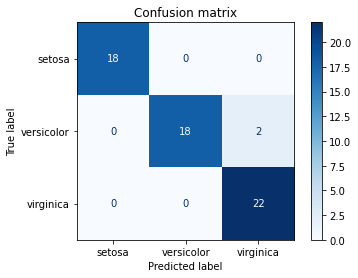

Macro F1 score :  0.9679633867276888

----------------------
kernel:	rbf
C:	inf
decision_function_shape:	ovo

learning done in 0.0 seconds


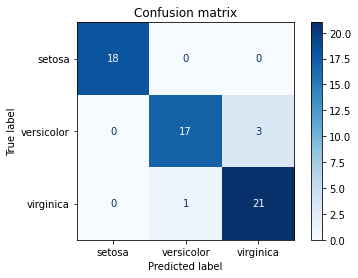

Macro F1 score :  0.9359267734553777

----------------------
kernel:	rbf
C:	inf
decision_function_shape:	ovr

learning done in 0.0 seconds


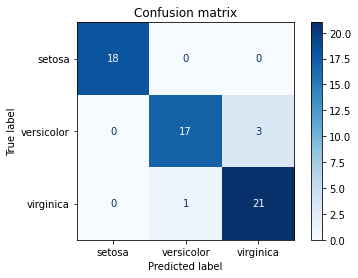

Macro F1 score :  0.9359267734553777

----------------------
kernel:	sigmoid
C:	1
decision_function_shape:	ovo

learning done in 0.0 seconds


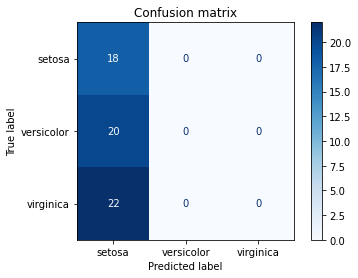

Macro F1 score :  0.15384615384615383

----------------------
kernel:	sigmoid
C:	1
decision_function_shape:	ovr

learning done in 0.0 seconds


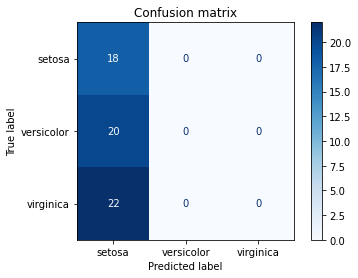

Macro F1 score :  0.15384615384615383

----------------------
kernel:	sigmoid
C:	2
decision_function_shape:	ovo

learning done in 0.0 seconds


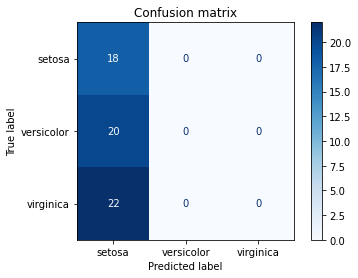

Macro F1 score :  0.15384615384615383

----------------------
kernel:	sigmoid
C:	2
decision_function_shape:	ovr

learning done in 0.0 seconds


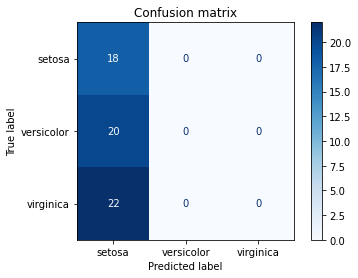

Macro F1 score :  0.15384615384615383

----------------------
kernel:	sigmoid
C:	5
decision_function_shape:	ovo

learning done in 0.0 seconds


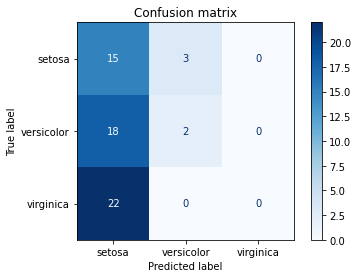

Macro F1 score :  0.19031963470319635

----------------------
kernel:	sigmoid
C:	5
decision_function_shape:	ovr

learning done in 0.0 seconds


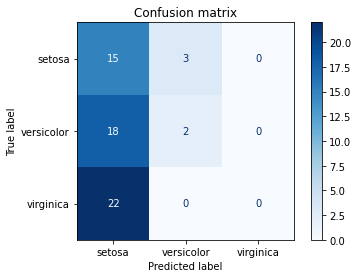

Macro F1 score :  0.19031963470319635

----------------------
kernel:	sigmoid
C:	10
decision_function_shape:	ovo

learning done in 0.0 seconds


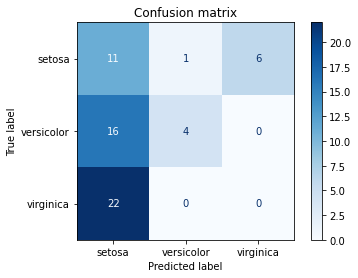

Macro F1 score :  0.21611940298507468

----------------------
kernel:	sigmoid
C:	10
decision_function_shape:	ovr

learning done in 0.0 seconds


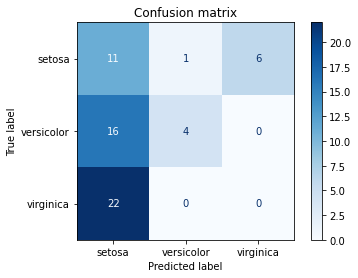

Macro F1 score :  0.21611940298507468

----------------------
kernel:	sigmoid
C:	inf
decision_function_shape:	ovo

learning done in 0.0 seconds


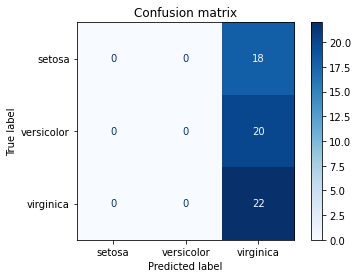

Macro F1 score :  0.17886178861788615

----------------------
kernel:	sigmoid
C:	inf
decision_function_shape:	ovr

learning done in 0.0 seconds


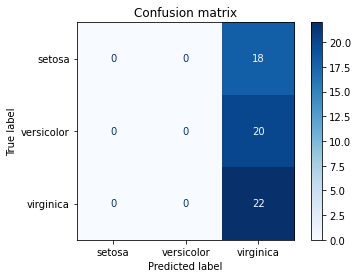

Macro F1 score :  0.17886178861788615


In [74]:
# custom gridsearch, with plot of confusion matrix
# it's fine to use a naive, almost brute-force implementation
# because the dataset is small and the classifier runs quickly 

best_param = {}
best_f1 = -999 # dummy value

for kernel in ["linear", "poly", "rbf", "sigmoid"]:
    for C in [1, 2, 5, 10, np.inf]:
        for decision_function_shape in ["ovo", "ovr"]:
            print("\n----------------------")
            print(f"kernel:\t{kernel}")
            print(f"C:\t{C}")
            print(f"decision_function_shape:\t{decision_function_shape}\n")
            
            mySvc = make_svc_model(
                kernel=kernel,
                C=C,
                decision_function_shape=decision_function_shape,
            )
            plot_cm_from_svc(mySvc=mySvc)
            
            f1 = f1_score_from_svc(mySvc=mySvc)
            if f1 > best_f1:
                best_f1 = f1
                best_param["kernel"] = kernel
                best_param["C"] = C
                best_param["decision_function_shape"] = decision_function_shape

In [76]:
print(f"The best parameters are: {best_param}")
print(f"and the best macro f1-score is: {best_f1}")

The best parameters are: {'kernel': 'linear', 'C': 1, 'decision_function_shape': 'ovo'}
and the best macro f1-score is: 0.9679633867276888


## dataset: MNIST


In [77]:
# necessary imports
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, f1_score


In [78]:
# reading the dataset
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0


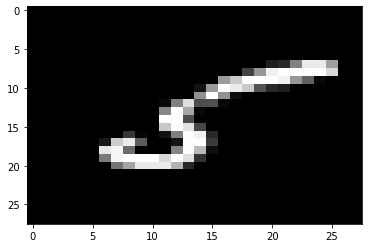

5


In [79]:
# display one of the pictures (the 11th in this code)
import matplotlib.pyplot as plt

i = 11  # index of the image: change it in order to display other images
plt.imshow(x_train[i], aspect="auto", cmap="gray")
plt.show()
print(y_train[i])


In [80]:
# case of binary classification: we choose coats and bags

# you can change the classes
class1 = 4  # negative class 'coats'
class2 = 8  # positive class 'bags'
nameClass1 = "4"
nameClass2 = "8"
mesClassesTrain = (y_train == class1) | (y_train == class2)
mesClassesTest = (y_test == class1) | (y_test == class2)

## TRAIN
x_trainBinaire = np.array(x_train[mesClassesTrain, :])
y_trainBinaire = np.array((y_train[mesClassesTrain] - class1) / (class2 - class1))

## TEST
x_testBinaire = np.array(x_test[mesClassesTest, :])
y_testBinaire = np.array((y_test[mesClassesTest] - class1) / (class2 - class1))


In [81]:
# reshaping the data (a 2d image is transformed to a 1d array)
# train
n = x_trainBinaire.shape[0]
x_trainBinaireLin = x_trainBinaire.reshape(n, -1)
# test
n = x_testBinaire.shape[0]
x_testBinaireLin = x_testBinaire.reshape(n, -1)


In [82]:
# default constructor
## your job is to build a SVC classifier
# learning
time_start = time.perf_counter()
## your job is to train your SVC classifier
time_elapsed = time.perf_counter() - time_start
print("learning done in %.2f seconds" % (time_elapsed))


learning done in 0.00 seconds


In [20]:
y_predBinaireTest = ## compute the prediction of x_testBinaireLin using your learned classifier

disp = plot_confusion_matrix(##the name of classifier, x_testBinaireLin, y_testBinaire,
                                 display_labels=[nameClass1,nameClass2],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Confusion matrix')
print("F1 score : ", f1_score(y_predBinaireTest,y_testBinaire))

SyntaxError: invalid syntax (1933383371.py, line 1)

Same question as for the Iris dataset: can you improve the results by tuning hyper-parameters or changing the kernel ?


## The whole dataset with the 10 classes


In [34]:
# your turn!
# reshaping the data (a 2d image is transformed to a 1d array)
# train
n = x_train.shape[0]
x_trainLin = x_train.reshape(n, -1)
# test
n = x_test.shape[0]
x_testLin = x_test.reshape(n, -1)


In [37]:
# default constructor
### your job is ....
mysvc = svm.SVC(kernel="linear", C=1)  # ,decision_function_shape='ovr')
# learning
time_start = time.perf_counter()
### your job is ...
mysvc.fit(x_trainLin, y_train)
time_elapsed = time.perf_counter() - time_start
print("learning done in %.2f seconds" % (time_elapsed))


learning done in 412.99 seconds


F1 score :  [0.96423174 0.97905759 0.9311507  0.9216545  0.94768612 0.90734463
 0.95337873 0.94146581 0.91832461 0.93084301]


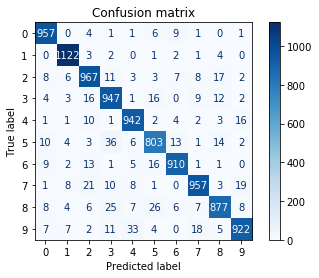

In [39]:
y_predTest = mysvc.predict(x_testLin)  ##theNameOfYourClassifier.predict(x_testLin)

disp = plot_confusion_matrix(
    mysvc,
    x_testLin,
    y_test,  ##theNameOfYourClassifier, x_testLin, y_test,
    display_labels=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"],
    cmap=plt.cm.Blues,
    normalize=None,
)
disp.ax_.set_title("Confusion matrix")
print("F1 score : ", f1_score(y_predTest, y_test, average=None))


In [ ]:
from sklearn.model_selection import GridSearchCV

paramGrid = [
    {"C": [0.1, 0.2, 0.5, 1, 2, 5, 10], "kernel": ["linear"]},
    {"C": [0.5, 1, 5, 10], "degree": [2, 3], "coef0": [-1, 0, 1], "kernel": ["poly"]},
]
searchBestParams = GridSearchCV(svm.SVC(), paramGrid, scoring="precision_macro")
searchBestParams.fit(x_trainLin, y_train)
# searchBestParams
means = searchBestParams.cv_results_["mean_test_score"]
stds = searchBestParams.cv_results_["std_test_score"]
for mean, std, params in zip(means, stds, searchBestParams.cv_results_["params"]):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()


In [ ]:
# using the best set of parameters, learn the SVM classifier (whole train set)
C = 
kernel = ''

## Do you obtain the same results with FMNIST ? (fashion MNIST)


In [ ]:
# your turn!


## Active learning with SVM


Start with few annoted data and iterate by asking new labelled data and re-learn SVM separation. Try different selection of new labelled data.


## Reduction of the dataset


Suffle and divide the train dataset by 2 multiple time. For each division, learn a SVM classifier and test the performances.


Do not consider the last part


## Classification of images


Represent the images using a deep CNN and perform the classification using SVM.
